Step 1 - Import python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm
from scipy import stats
pd.options.mode.chained_assignment = None

Step 2 - Load and read the data file
1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

In [3]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/complete_COVID_samples.tsv')
df

Step 2 - Option 2 - Upload data file from local computer

In [4]:
from google.colab import files 
uploaded = files.upload()

In [5]:
import io

#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_COVID_samples.tsv']), sep = '\t')
df

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [2]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table('../../../downloads/covid_data/complete_COVID_samples.tsv', sep = '\t',low_memory=False)
df

sample  frequency  templates       amino_acid  \
0            6232BW_TCRB   0.006751       3636    CASSLGLAGPGFF   
1            6232BW_TCRB   0.005639       3037   CASRVGSSYNEQFF   
2            6232BW_TCRB   0.004258       2293  CASNPYRVNTGELFF   
3            6232BW_TCRB   0.003639       1960  CASSALRSSYNEQFF   
4            6232BW_TCRB   0.003521       1896  CASSFEDEGGETQYF   
...                  ...        ...        ...              ...   
15061643  1566265BW_TCRB   0.000001          1     CSVEDLRGGYTF   
15061644  1566265BW_TCRB   0.000001          1    CASGRRGDYGYTF   
15061645  1566265BW_TCRB   0.000001          1    CASSWTGNSPLHF   
15061646  1566265BW_TCRB   0.000001          1  CASSLDWTEYYEQYF   
15061647  1566265BW_TCRB   0.000001          1    CASSSSGASEQYF   

                                              rearrangement  \
0         ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...   
1         ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...   
2         GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...   
3         CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...   
4         AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...   
...                                                     ...   
15061643  CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...   
15061644  AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...   
15061645  AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...   
15061646  CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...   
15061647  AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...   

                   v_resolved     d_resolved     j_resolved  age  gender  ...  \
0                  TCRBV07-02  TCRBD02-01*02  TCRBJ02-01*01   72    Male  ...   
1                     TCRBV12  TCRBD02-01*02  TCRBJ02-01*01   72    Male  ...   
2               TCRBV27-01*01  TCRBD02-01*02  TCRBJ02-02*01   72    Male  ...   
3                     TCRBV12        unknown  TCRBJ02-01*01   72    Male  ...   
4               TCRBV05-06*01        unknown  TCRBJ02-05*01   72    Male  ...   
...                       ...            ...            ...  ...     ...  ...   
15061643           TCRBV29-01        unknown  TCRBJ01-02*01   33  Female  ...   
15061644  TCRBV12-03/12-04*01        unknown  TCRBJ01-02*01   33  Female  ...   
15061645  TCRBV12-03/12-04*01     TCRBD02-01  TCRBJ01-06*02   33  Female  ...   
15061646        TCRBV11-02*01  TCRBD01-01*01  TCRBJ02-07*01   33  Female  ...   
15061647  TCRBV12-03/12-04*01  TCRBD02-01*01  TCRBJ02-07*01   33  Female  ...   

          icu_admit  birth_year  blood_type cmv_at_donation  \
0             False        1948      ab neg             NEG   
1             False        1948      ab neg             NEG   
2             False        1948      ab neg             NEG   
3             False        1948      ab neg             NEG   
4             False        1948      ab neg             NEG   
...             ...         ...         ...             ...   
15061643      False        1987         NaN             NaN   
15061644      False        1987         NaN             NaN   
15061645      False        1987         NaN             NaN   
15061646      False        1987         NaN             NaN   
15061647      False        1987         NaN             NaN   

         days_from_last_symptom_to_sample            ethnicity height_meters  \
0                                    26.0  not hispanic/latino         1.778   
1                                    26.0  not hispanic/latino         1.778   
2                                    26.0  not hispanic/latino         1.778   
3                                    26.0  not hispanic/latino         1.778   
4                                    26.0  not hispanic/latino         1.778   
...                                   ...                  ...           ...   
15061643                             51.0  not hispanic/latino         1.676   
15061644                             51.0  not hispanic/latino         1.676   
150616

Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [3]:
#select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]
#rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalization']

#if there are more than one v,d,j, leave only the first one 
df['v']=df['v'].str.replace("(/).*","")
df['d']=df['d'].str.replace("(/).*","")
df['j']=df['j'].str.replace("(/).*","")

Usage analysis 1 - Top n highest clonotypes 

1.   change the number in the tail () to the number that you are interested in 



In [4]:
df1=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').tail(10)
df1 = df1[['freq', 'cdr3aa', 'sample', 'hospitalization']]
df1

freq             cdr3aa          sample  hospitalization
13483024  0.000881    CASSQAPTGPYEQYF  1132289BW_TCRB            False
13483023  0.001140     CASSPRDRGDEQYF  1132289BW_TCRB            False
13483022  0.001276  CASSLTMLAGAGGELFF  1132289BW_TCRB            False
13483021  0.001331     CASSSGVGNQPQHF  1132289BW_TCRB            False
13483020  0.001341  CASTGTDNGLYNSPLHF  1132289BW_TCRB            False
...            ...                ...             ...              ...
437916    0.001801     CASSLVAGGFEQYF   989003BW_TCRB             True
437915    0.002060    CSASDLGGRLDTQYF   989003BW_TCRB             True
437914    0.002458        CASSQGYEQYF   989003BW_TCRB             True
437913    0.006403    CASSLTSGSLNEQFF   989003BW_TCRB             True
437912    0.006787    CASSLDRETVYGYTF   989003BW_TCRB             True

[470 rows x 4 columns]

Usage analysis 2 - Bottom n lowest clonotypes 

1.   change the number in the head () to the number that you are interested in 



In [5]:
df2=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').head(10)
df2=df2[['freq', 'cdr3aa', 'sample', 'hospitalization']]
df2

freq            cdr3aa          sample  hospitalization
13533460  0.000001    CASSSQQGSYGYTF  1132289BW_TCRB            False
13533461  0.000001    CASSYSAGSYGYTF  1132289BW_TCRB            False
13533462  0.000001   CASRRTLPGNYEQYF  1132289BW_TCRB            False
13533463  0.000001    CASRGQAISYGYTF  1132289BW_TCRB            False
13533464  0.000001   CASSITGTGNYEQYF  1132289BW_TCRB            False
...            ...               ...             ...              ...
486295    0.000002    CASSGGTAVEGYTF   989003BW_TCRB             True
486296    0.000002   CASSLETGVGTGYTF   989003BW_TCRB             True
486297    0.000002      CSAREGLAEQYF   989003BW_TCRB             True
486298    0.000002  CASSLNPQGRAEGYTF   989003BW_TCRB             True
486299    0.000002     CASSPRTGEGYTF   989003BW_TCRB             True

[470 rows x 4 columns]

Usage analysis 3 - Top n highest V gene (D gene, J gene)
1.   change the number in the tail () to the number that you are interested in 
2.   change 'v' to other genes that you are interested in

In [6]:
df3 = df[['freq', 'v', 'sample','hospitalization']]
df3=df3.sort_values(['sample','freq'], axis=0).groupby('sample').tail(10)
df3

freq              v          sample  hospitalization
13483024  0.000881  TCRBV04-01*01  1132289BW_TCRB            False
13483023  0.001140  TCRBV06-02*02  1132289BW_TCRB            False
13483022  0.001276  TCRBV07-03*01  1132289BW_TCRB            False
13483021  0.001331  TCRBV07-03*01  1132289BW_TCRB            False
13483020  0.001341     TCRBV07-09  1132289BW_TCRB            False
...            ...            ...             ...              ...
437916    0.001801  TCRBV19-01*01   989003BW_TCRB             True
437915    0.002060  TCRBV20-01*04   989003BW_TCRB             True
437914    0.002458     TCRBV03-01   989003BW_TCRB             True
437913    0.006403  TCRBV19-01*01   989003BW_TCRB             True
437912    0.006787  TCRBV05-04*01   989003BW_TCRB             True

[470 rows x 4 columns]

Usage analysis 4 - Bottom n lowest V gene (D gene, J gene)

1.   change the number in the head () to the number that you are interested in 
2.   change 'v' to other genes that you are interested in


In [7]:
df4 = df[['freq', 'v', 'sample','hospitalization']]
df4 = df4.sort_values(['sample','freq'], axis=0).groupby('sample').head(10)
df4

freq              v          sample  hospitalization
13533460  0.000001  TCRBV19-01*01  1132289BW_TCRB            False
13533461  0.000001  TCRBV06-05*01  1132289BW_TCRB            False
13533462  0.000001     TCRBV07-02  1132289BW_TCRB            False
13533463  0.000001  TCRBV05-01*01  1132289BW_TCRB            False
13533464  0.000001  TCRBV06-05*01  1132289BW_TCRB            False
...            ...            ...             ...              ...
486295    0.000002     TCRBV02-01   989003BW_TCRB             True
486296    0.000002  TCRBV05-06*01   989003BW_TCRB             True
486297    0.000002        TCRBV20   989003BW_TCRB             True
486298    0.000002     TCRBV11-02   989003BW_TCRB             True
486299    0.000002  TCRBV18-01*01   989003BW_TCRB             True

[470 rows x 4 columns]

Usage analysis 5.1 - V gene weighted usage (D gene, J gene)
1.   change 'v' to other genes that you are interested in

In [8]:
df_frequency=df.groupby(['sample','v','hospitalization'], as_index=False)['freq'].agg({'frequency':'sum'})
df_frequency

sample              v  hospitalization  frequency
0     1132289BW_TCRB  TCRBV01-01*01            False   0.000885
1     1132289BW_TCRB     TCRBV02-01            False   0.031511
2     1132289BW_TCRB     TCRBV03-01            False   0.029386
3     1132289BW_TCRB        TCRBV04            False   0.000045
4     1132289BW_TCRB  TCRBV04-01*01            False   0.020029
...              ...            ...              ...        ...
4628   989003BW_TCRB     TCRBV30-01             True   0.002628
4629   989003BW_TCRB  TCRBV30-01*01             True   0.017288
4630   989003BW_TCRB  TCRBV30-01*05             True   0.001720
4631   989003BW_TCRB   TCRBVA-01*01             True   0.000021
4632   989003BW_TCRB        unknown             True   0.000634

[4633 rows x 4 columns]

Usage analysis 5.1.1 - Test if the dataset is normally distributed
1.  the null hypothesis here is normality
2.  if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [9]:
x = stats.normaltest(df_frequency['frequency'])
x

NormaltestResult(statistic=2950.3412662574083, pvalue=0.0)

Usage analysis 5.1.2 - Stat test
1.  if the dataset is normally distributed, use t-test (stats.ttest_ind)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in
2.  if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in

In [10]:
def usage_stat(df):
    out = {}
    uniq_vsegs = df['v'].unique()
    for V in uniq_vsegs:
        tmp = df[df['v'] == V]
        df_group1 = tmp[tmp['hospitalization'] == True]['frequency']
        df_group2 = tmp[tmp['hospitalization'] == False]['frequency']
        stat = stats.ranksums(df_group1, df_group2)
        out[V] = stat
    return out

In [11]:
#stat calculation
usage_stat(df_frequency)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:7246: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


{'TCRBV01-01*01': RanksumsResult(statistic=-0.1494035761667992, pvalue=0.8812351900302706),
 'TCRBV02-01': RanksumsResult(statistic=-1.2549900398011133, pvalue=0.20948237571633044),
 'TCRBV03-01': RanksumsResult(statistic=-0.08964214570007951, pvalue=0.9285715917804441),
 'TCRBV04': RanksumsResult(statistic=-1.7330814835348707, pvalue=0.08308118696647387),
 'TCRBV04-01*01': RanksumsResult(statistic=-1.88248505970167, pvalue=0.05977018652455784),
 'TCRBV04-02': RanksumsResult(statistic=1.2251093245677536, pvalue=0.2205340323666295),
 'TCRBV04-02*01': RanksumsResult(statistic=0.11952286093343936, pvalue=0.9048611294504482),
 'TCRBV04-02*02': RanksumsResult(statistic=-0.4183300132670378, pvalue=0.6757058487030954),
 'TCRBV04-03*01': RanksumsResult(statistic=-0.8549819600709617, pvalue=0.39256113482092736),
 'TCRBV05': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV05-01*01': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV05-03': RanksumsResult(statistic=-0.8964214570007952, pvalue=0

Usage analysis 5.1.3 - Show the V gene weighted usage that are statically significant
1.   change the specific v gene to the ones that are statically significant in your analysis
2.   change 'v' to other genes that you are interested in

In [12]:
df_frequency_significant = df_frequency.loc[(df_frequency['v'] == 'TCRBV05-05*01') | (df_frequency['v'] == 'TCRBV13-01*01') | (df_frequency['v'] == 'TCRBV20')] 
df_frequency_significant = df_frequency_significant.groupby(['hospitalization','v']).agg({'frequency':'mean'}).reset_index().rename(columns={'frequency':"mean_frequency"})
df_frequency_significant 

hospitalization              v  mean_frequency
0            False  TCRBV05-05*01        0.008403
1            False  TCRBV13-01*01        0.006918
2            False        TCRBV20        0.058781
3             True  TCRBV05-05*01        0.006590
4             True  TCRBV13-01*01        0.004187
5             True        TCRBV20        0.063755

Usage analysis 5.2 - V gene weighted usage heatmap (D gene, J gene)
1.   change 'v' to other genes that you are interested in

Text(0.5, 1, 'V gene weighted usage')

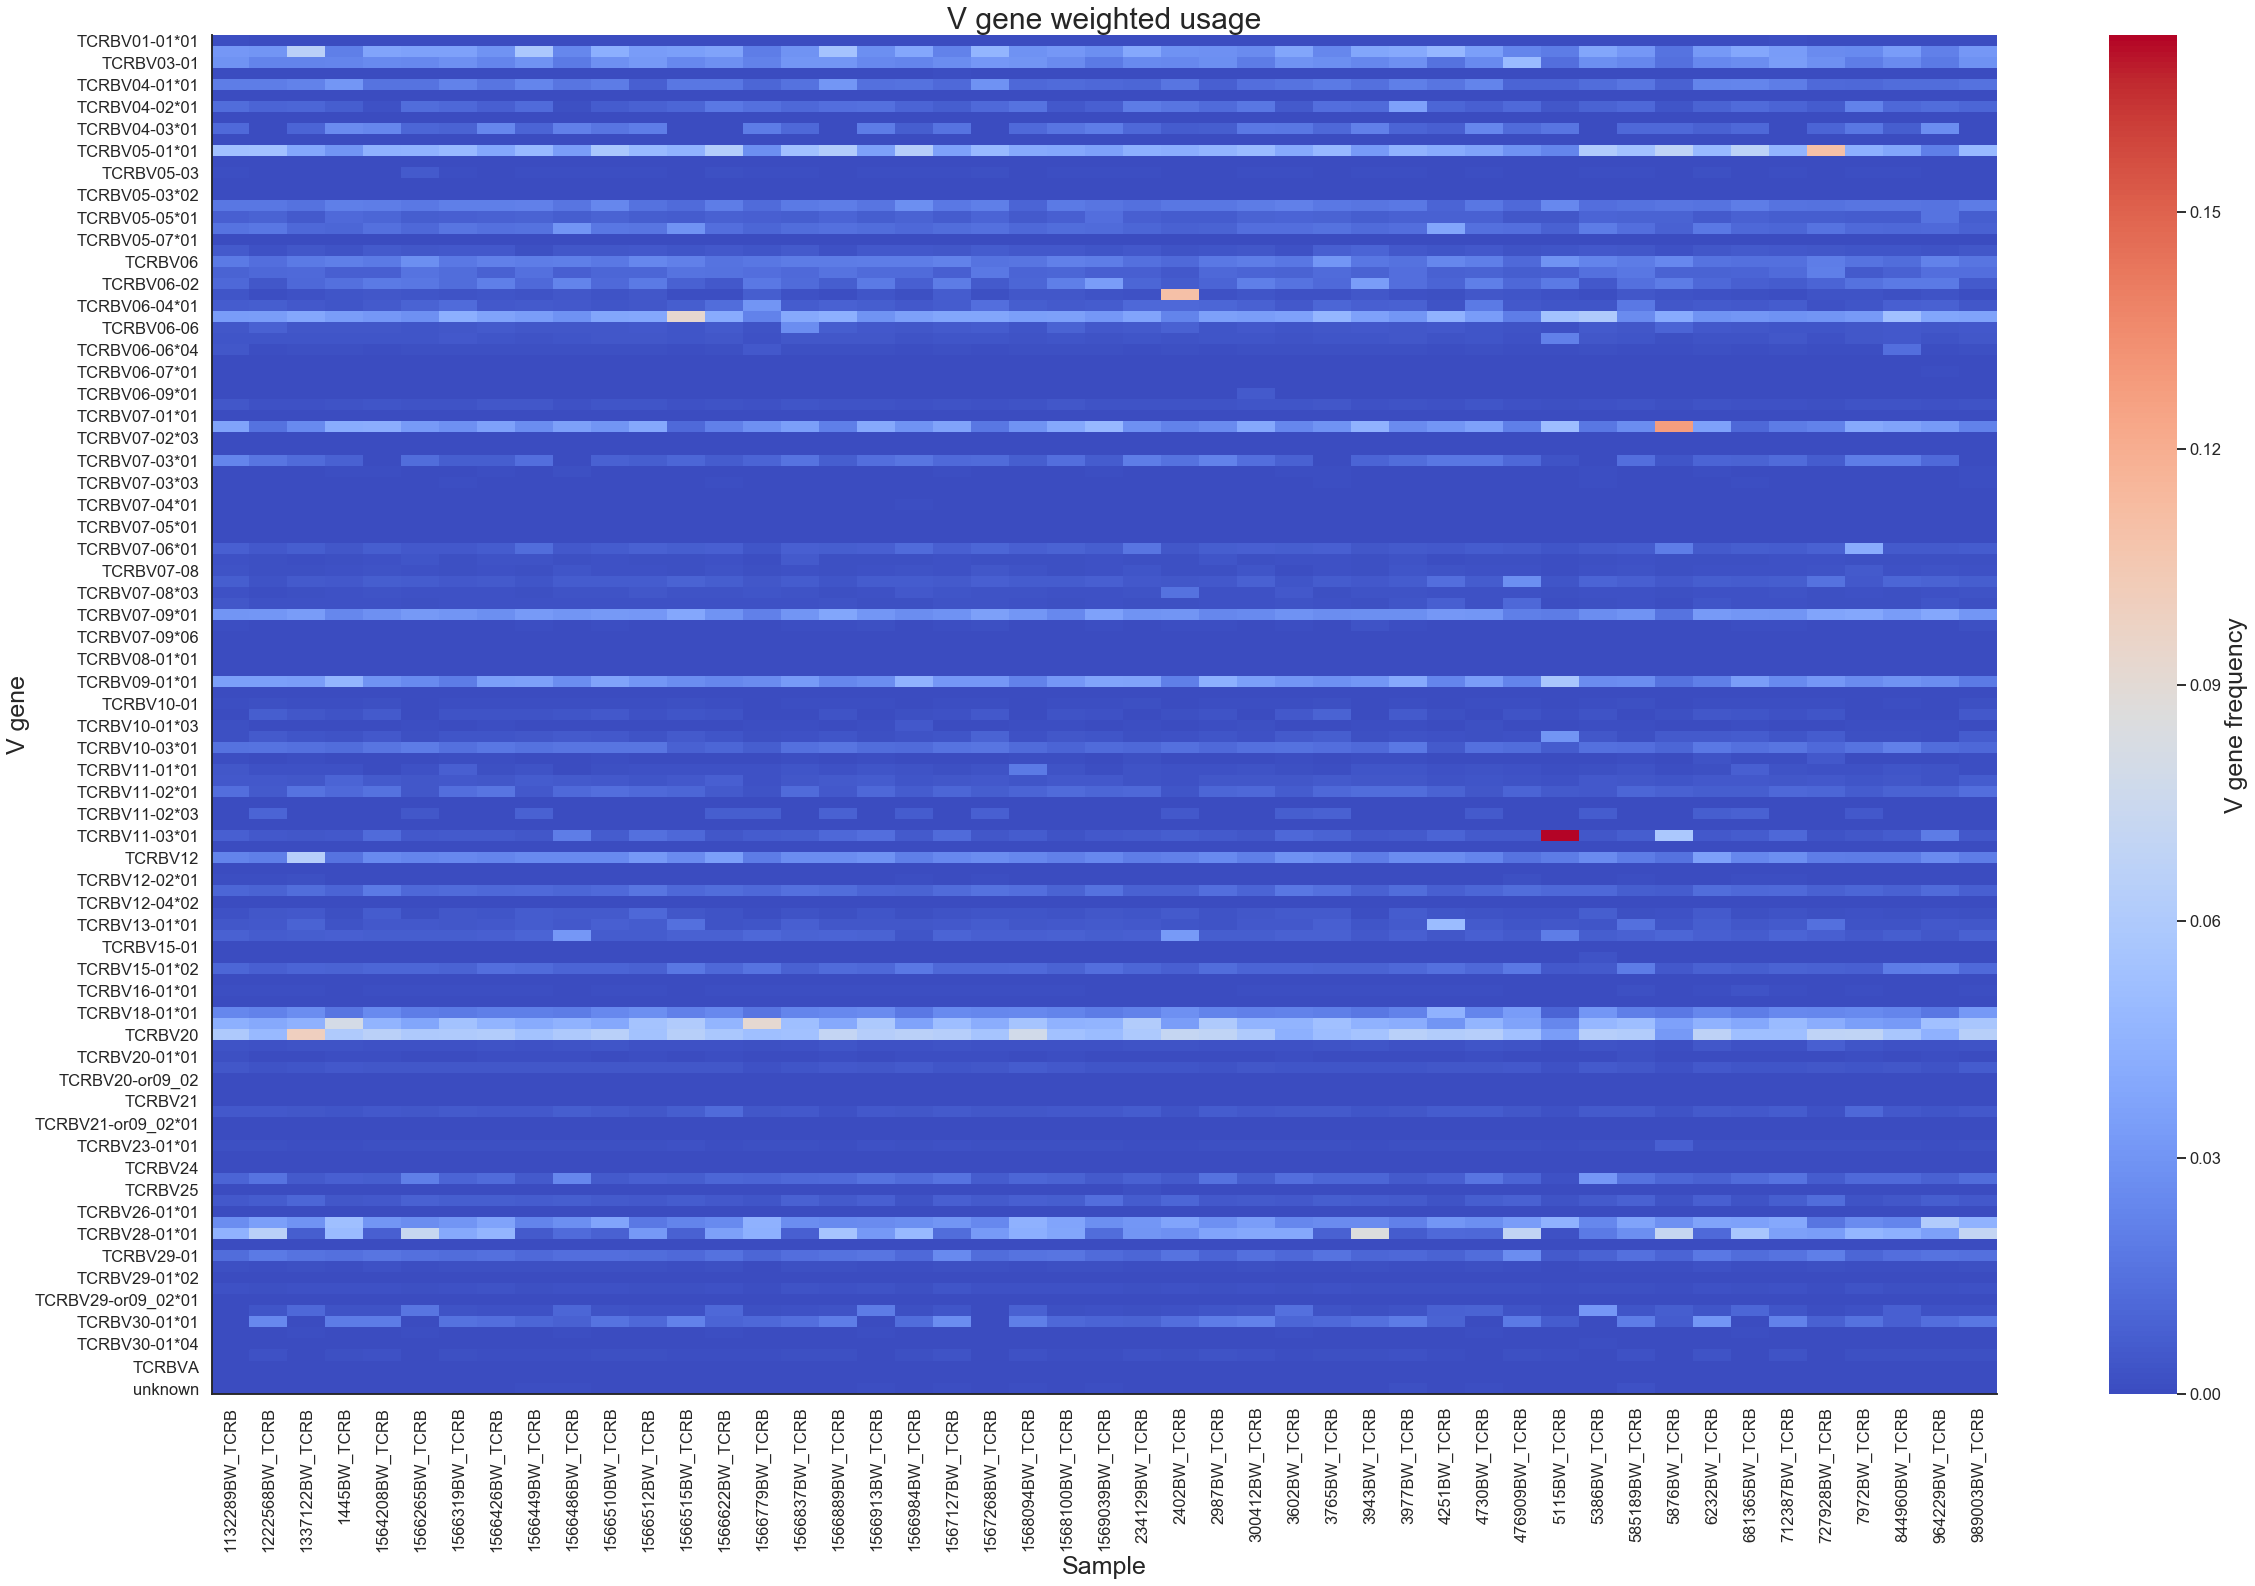

In [13]:
#set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))
sns.set_style("white")
sns.set_context("talk")

#prepare the data
df_frequency['frequency'] = df_frequency['frequency'].astype(float)
result = df_frequency.pivot(index='v',columns='sample',values='frequency')

#fill the missing value in frequency with 0
result = result.fillna(0)

#plot the heatmap
ax = sns.heatmap(result, cmap='coolwarm', cbar_kws={'label': 'V gene frequency'})
ax.set_xlabel('Sample',fontsize=25)
ax.set_ylabel('V gene',fontsize=25)
cbar_axes = ax.figure.axes[-1]

#change the colorbar label fontsize
ax.figure.axes[-1].yaxis.label.set_size(25)
sns.despine()
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('V gene weighted usage', fontsize=30)

Usage analysis 5.3 - V gene weighted usage hierarchically-clustered heatmap (D gene, J gene)
1.  change 'v' to other genes that you are interested in

Text(0.5, 0.98, 'V gene weighted usage')

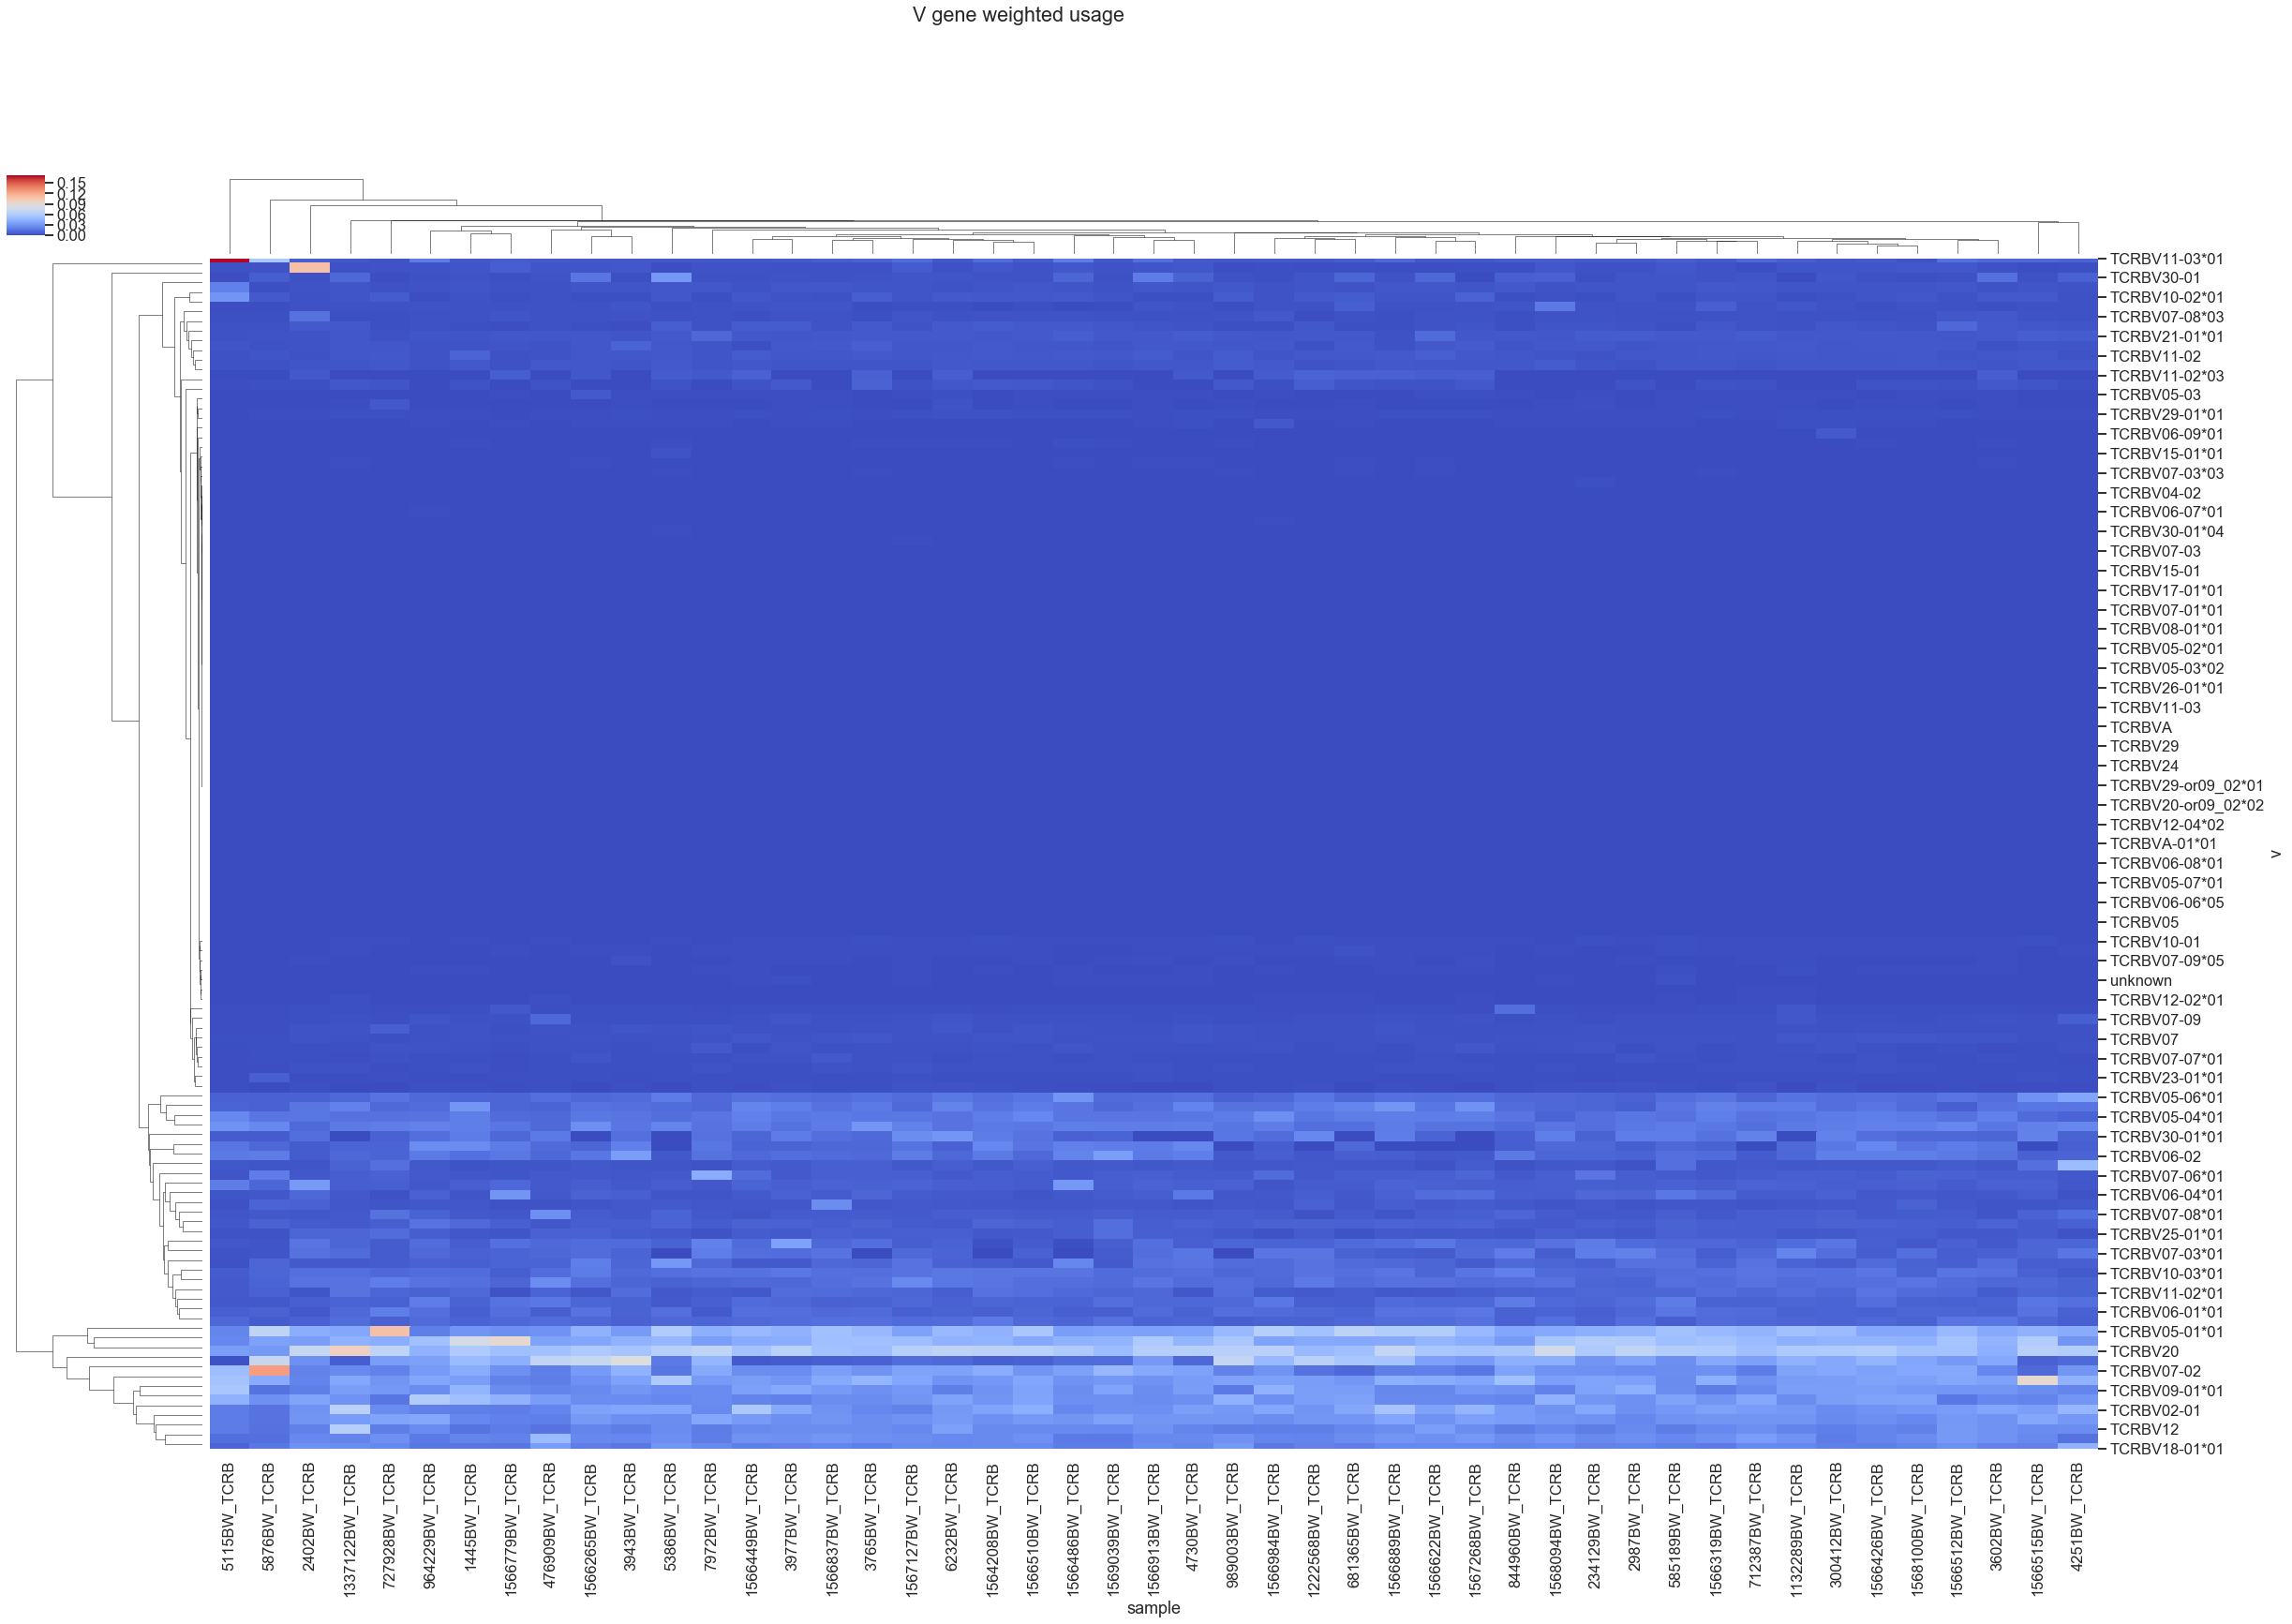

In [14]:
#reshape the dataframe to wide form dataframe
heatmap_data = pd.pivot_table(df_frequency, values='frequency', index=['v'], columns='sample')

#fill the missing value in frequency with 0
clustermap_data = heatmap_data.fillna(0)

#plot the hierarchically-clustered heatmap
ax = sns.clustermap(clustermap_data, figsize=(40,25),cmap="coolwarm")
ax.fig.suptitle('V gene weighted usage') 

Usage analysis 6.1 - V gene unweighted frequency result table (D gene, J gene)
1.  change 'v' to other genes that you are interested in

In [15]:
#select the v and sample columns
df_unweighted_frequency = df[['v','sample','hospitalization']]

#count the v gene 
df_unweighted_frequency = df_unweighted_frequency.groupby(['sample','v','hospitalization'], as_index=False)['v'].agg({'count':'count'})

#sum the total v gene counts in each sample
df_sum_count=df_unweighted_frequency.groupby(['sample','hospitalization'], as_index=False)['count'].agg({'sum_count':'sum'})

#add the sum counts of v gene to the dataframe which contains each v gene count
df_unweighted_frequency=pd.merge(df_unweighted_frequency, df_sum_count, on=['sample','hospitalization'])

#calculate the v gene unweighted frequency
df_unweighted_frequency['unweighted_frequency']=(df_unweighted_frequency['count']/df_unweighted_frequency['sum_count'])

df_unweighted_frequency = df_unweighted_frequency[['sample', 'v', 'unweighted_frequency','hospitalization']]
df_unweighted_frequency

sample              v  unweighted_frequency  hospitalization
0     1132289BW_TCRB  TCRBV01-01*01              0.000643            False
1     1132289BW_TCRB     TCRBV02-01              0.034902            False
2     1132289BW_TCRB     TCRBV03-01              0.037684            False
3     1132289BW_TCRB        TCRBV04              0.000079            False
4     1132289BW_TCRB  TCRBV04-01*01              0.018613            False
...              ...            ...                   ...              ...
4628   989003BW_TCRB     TCRBV30-01              0.003508             True
4629   989003BW_TCRB  TCRBV30-01*01              0.022695             True
4630   989003BW_TCRB  TCRBV30-01*05              0.002396             True
4631   989003BW_TCRB   TCRBVA-01*01              0.000030             True
4632   989003BW_TCRB        unknown              0.000885             True

[4633 rows x 4 columns]

Usage analysis 6.1.1 - Test if the dataset is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [16]:
x = stats.normaltest(df_unweighted_frequency['unweighted_frequency'])
x

NormaltestResult(statistic=2139.640904084751, pvalue=0.0)

Usage analysis 6.1.2 - Stat test
1.   if the dataset is normally distributed, use t-test (stats.ttest_ind)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in
2.   if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in

In [17]:
def unweighted_usage_stat(df):
    out = {}
    uniq_vsegs = df['v'].unique()
    for V in uniq_vsegs:
        tmp = df[df['v'] == V]
        df_group1 = tmp[tmp['hospitalization'] == True]['unweighted_frequency']
        df_group2 = tmp[tmp['hospitalization'] == False]['unweighted_frequency']
        stat = stats.ranksums(df_group1, df_group2)
        out[V] = stat
    return out

In [18]:
#stat calculation
unweighted_usage_stat(df_unweighted_frequency)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:7246: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


{'TCRBV01-01*01': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV02-01': RanksumsResult(statistic=-1.0757057484009542, pvalue=0.28205887576155886),
 'TCRBV03-01': RanksumsResult(statistic=0.6274950199005567, pvalue=0.5303347996135118),
 'TCRBV04': RanksumsResult(statistic=-0.7768985960673559, pvalue=0.4372185996250276),
 'TCRBV04-01*01': RanksumsResult(statistic=-1.0757057484009542, pvalue=0.28205887576155886),
 'TCRBV04-02': RanksumsResult(statistic=-0.47809144373375745, pvalue=0.6325851216960414),
 'TCRBV04-02*01': RanksumsResult(statistic=0.08964214570007951, pvalue=0.9285715917804441),
 'TCRBV04-02*02': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV04-03*01': RanksumsResult(statistic=-0.34199278402838473, pvalue=0.7323563227234923),
 'TCRBV05': RanksumsResult(statistic=-0.2091650066335189, pvalue=0.8343194288581393),
 'TCRBV05-01*01': RanksumsResult(statistic=0.6274950199005567, pvalue=0.5303347996135118),
 'TCRBV05-03': RanksumsResult(statistic=-0.11952286093343936, pvalue=

Usage analysis 5.1.3 - Show the V gene weighted usage that are statically significant
1.   change the specific v gene to the ones that are statically significant in your analysis
2.   change 'v' to other genes that you are interested in

In [19]:
df_unweighted_frequency_significant = df_unweighted_frequency.loc[(df_unweighted_frequency['v'] == 'TCRBV18-01*01') | (df_unweighted_frequency['v'] == 'TCRBV30-01*01')] 
df_unweighted_frequency_significant = df_unweighted_frequency_significant.groupby(['hospitalization','v']).agg({'unweighted_frequency':'mean'}).reset_index().rename(columns={'frequency':"mean_unweighted_frequency"})
df_unweighted_frequency_significant

hospitalization              v  unweighted_frequency
0            False  TCRBV18-01*01              0.031463
1            False  TCRBV30-01*01              0.018569
2             True  TCRBV18-01*01              0.035022
3             True  TCRBV30-01*01              0.024681

Usage analysis 6.2 - V gene weighted usage heatmap (D gene, J gene)
1.   change 'v' to other genes that you are interested in

Text(0.5, 1, 'V gene unweighted usage')

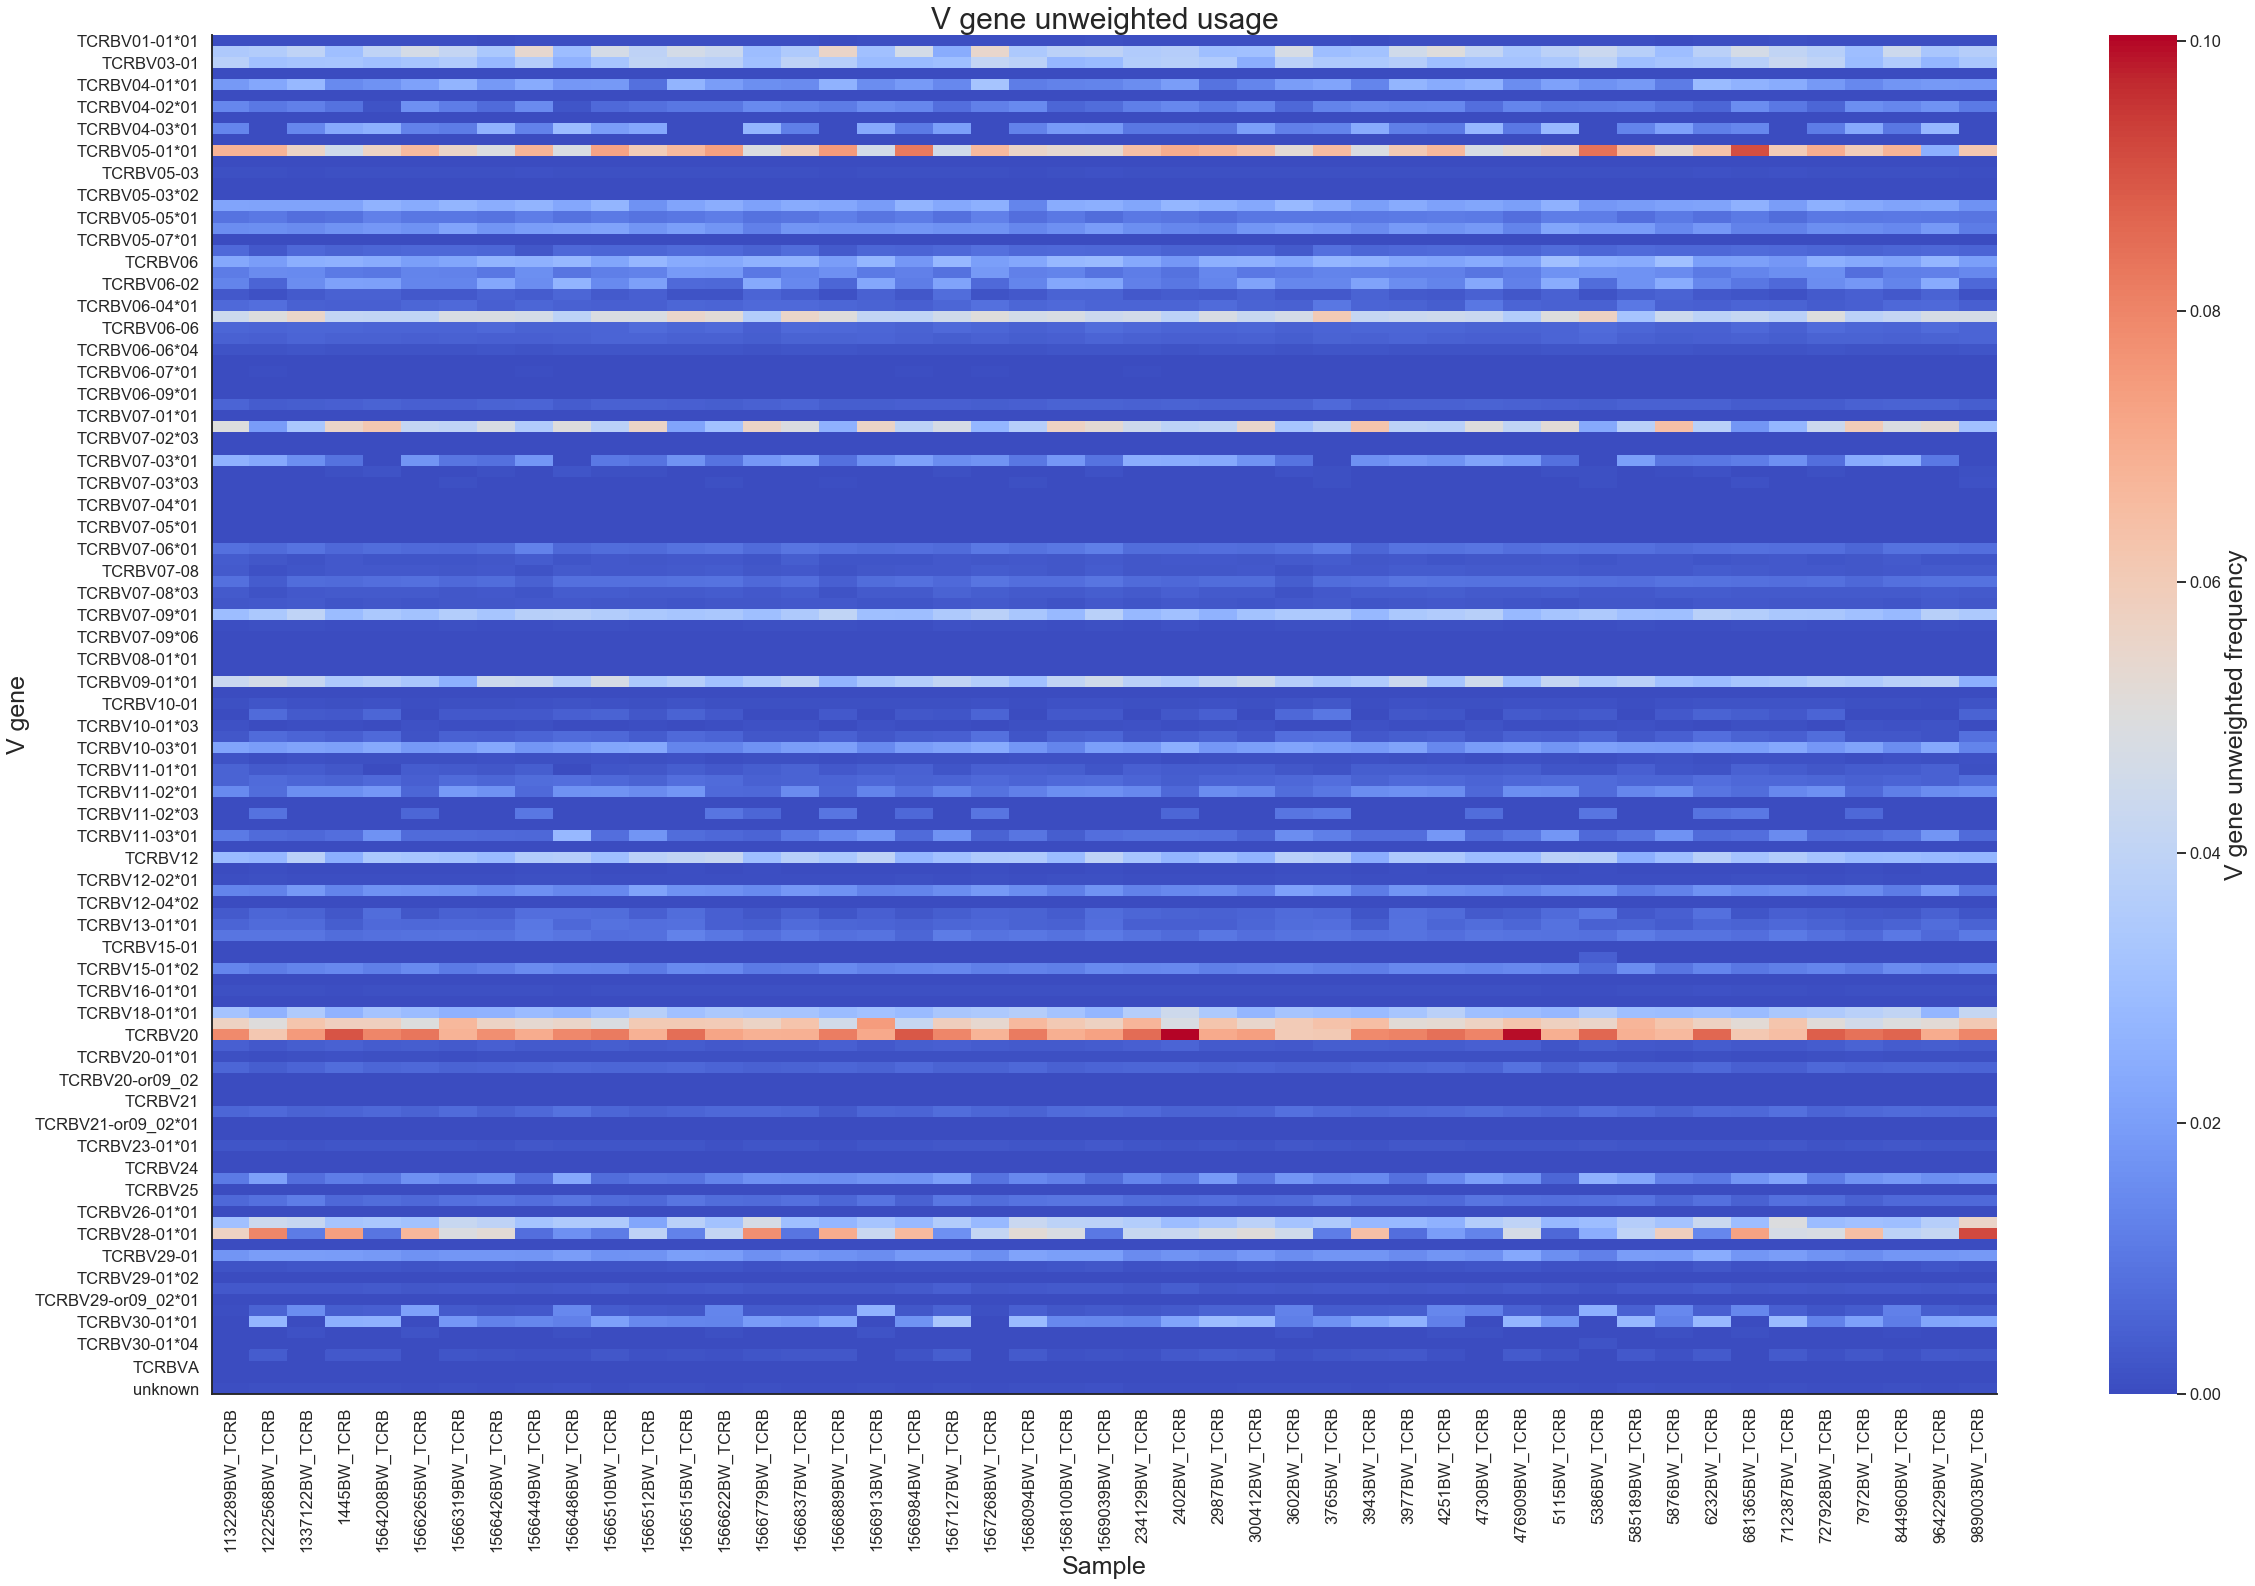

In [20]:
#set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))
sns.set_style("white")
sns.set_context("talk")

#generate axes
df_unweighted_frequency['unweighted_frequency'] = df_unweighted_frequency['unweighted_frequency'].astype(float)
result = df_unweighted_frequency.pivot(index='v',columns='sample',values='unweighted_frequency')

#fill the missing value in frequency with 0
result = result.fillna(0)

ax = sns.heatmap(result, cmap='coolwarm',cbar_kws={'label': 'V gene unweighted frequency'})
ax.set_xlabel('Sample',fontsize=25)
ax.set_ylabel('V gene',fontsize=25)
cbar_axes = ax.figure.axes[-1]

#change the colorbar label fontsize
ax.figure.axes[-1].yaxis.label.set_size(25)
sns.despine()
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('V gene unweighted usage',fontsize=30)

Usage analysis 6.3 - V gene weighted usage hierarchically-clustered heatmap (D gene, J gene)
1.   change 'v' to other genes that you are interested in

Text(0.5, 0.98, 'V gene unweighted usage')

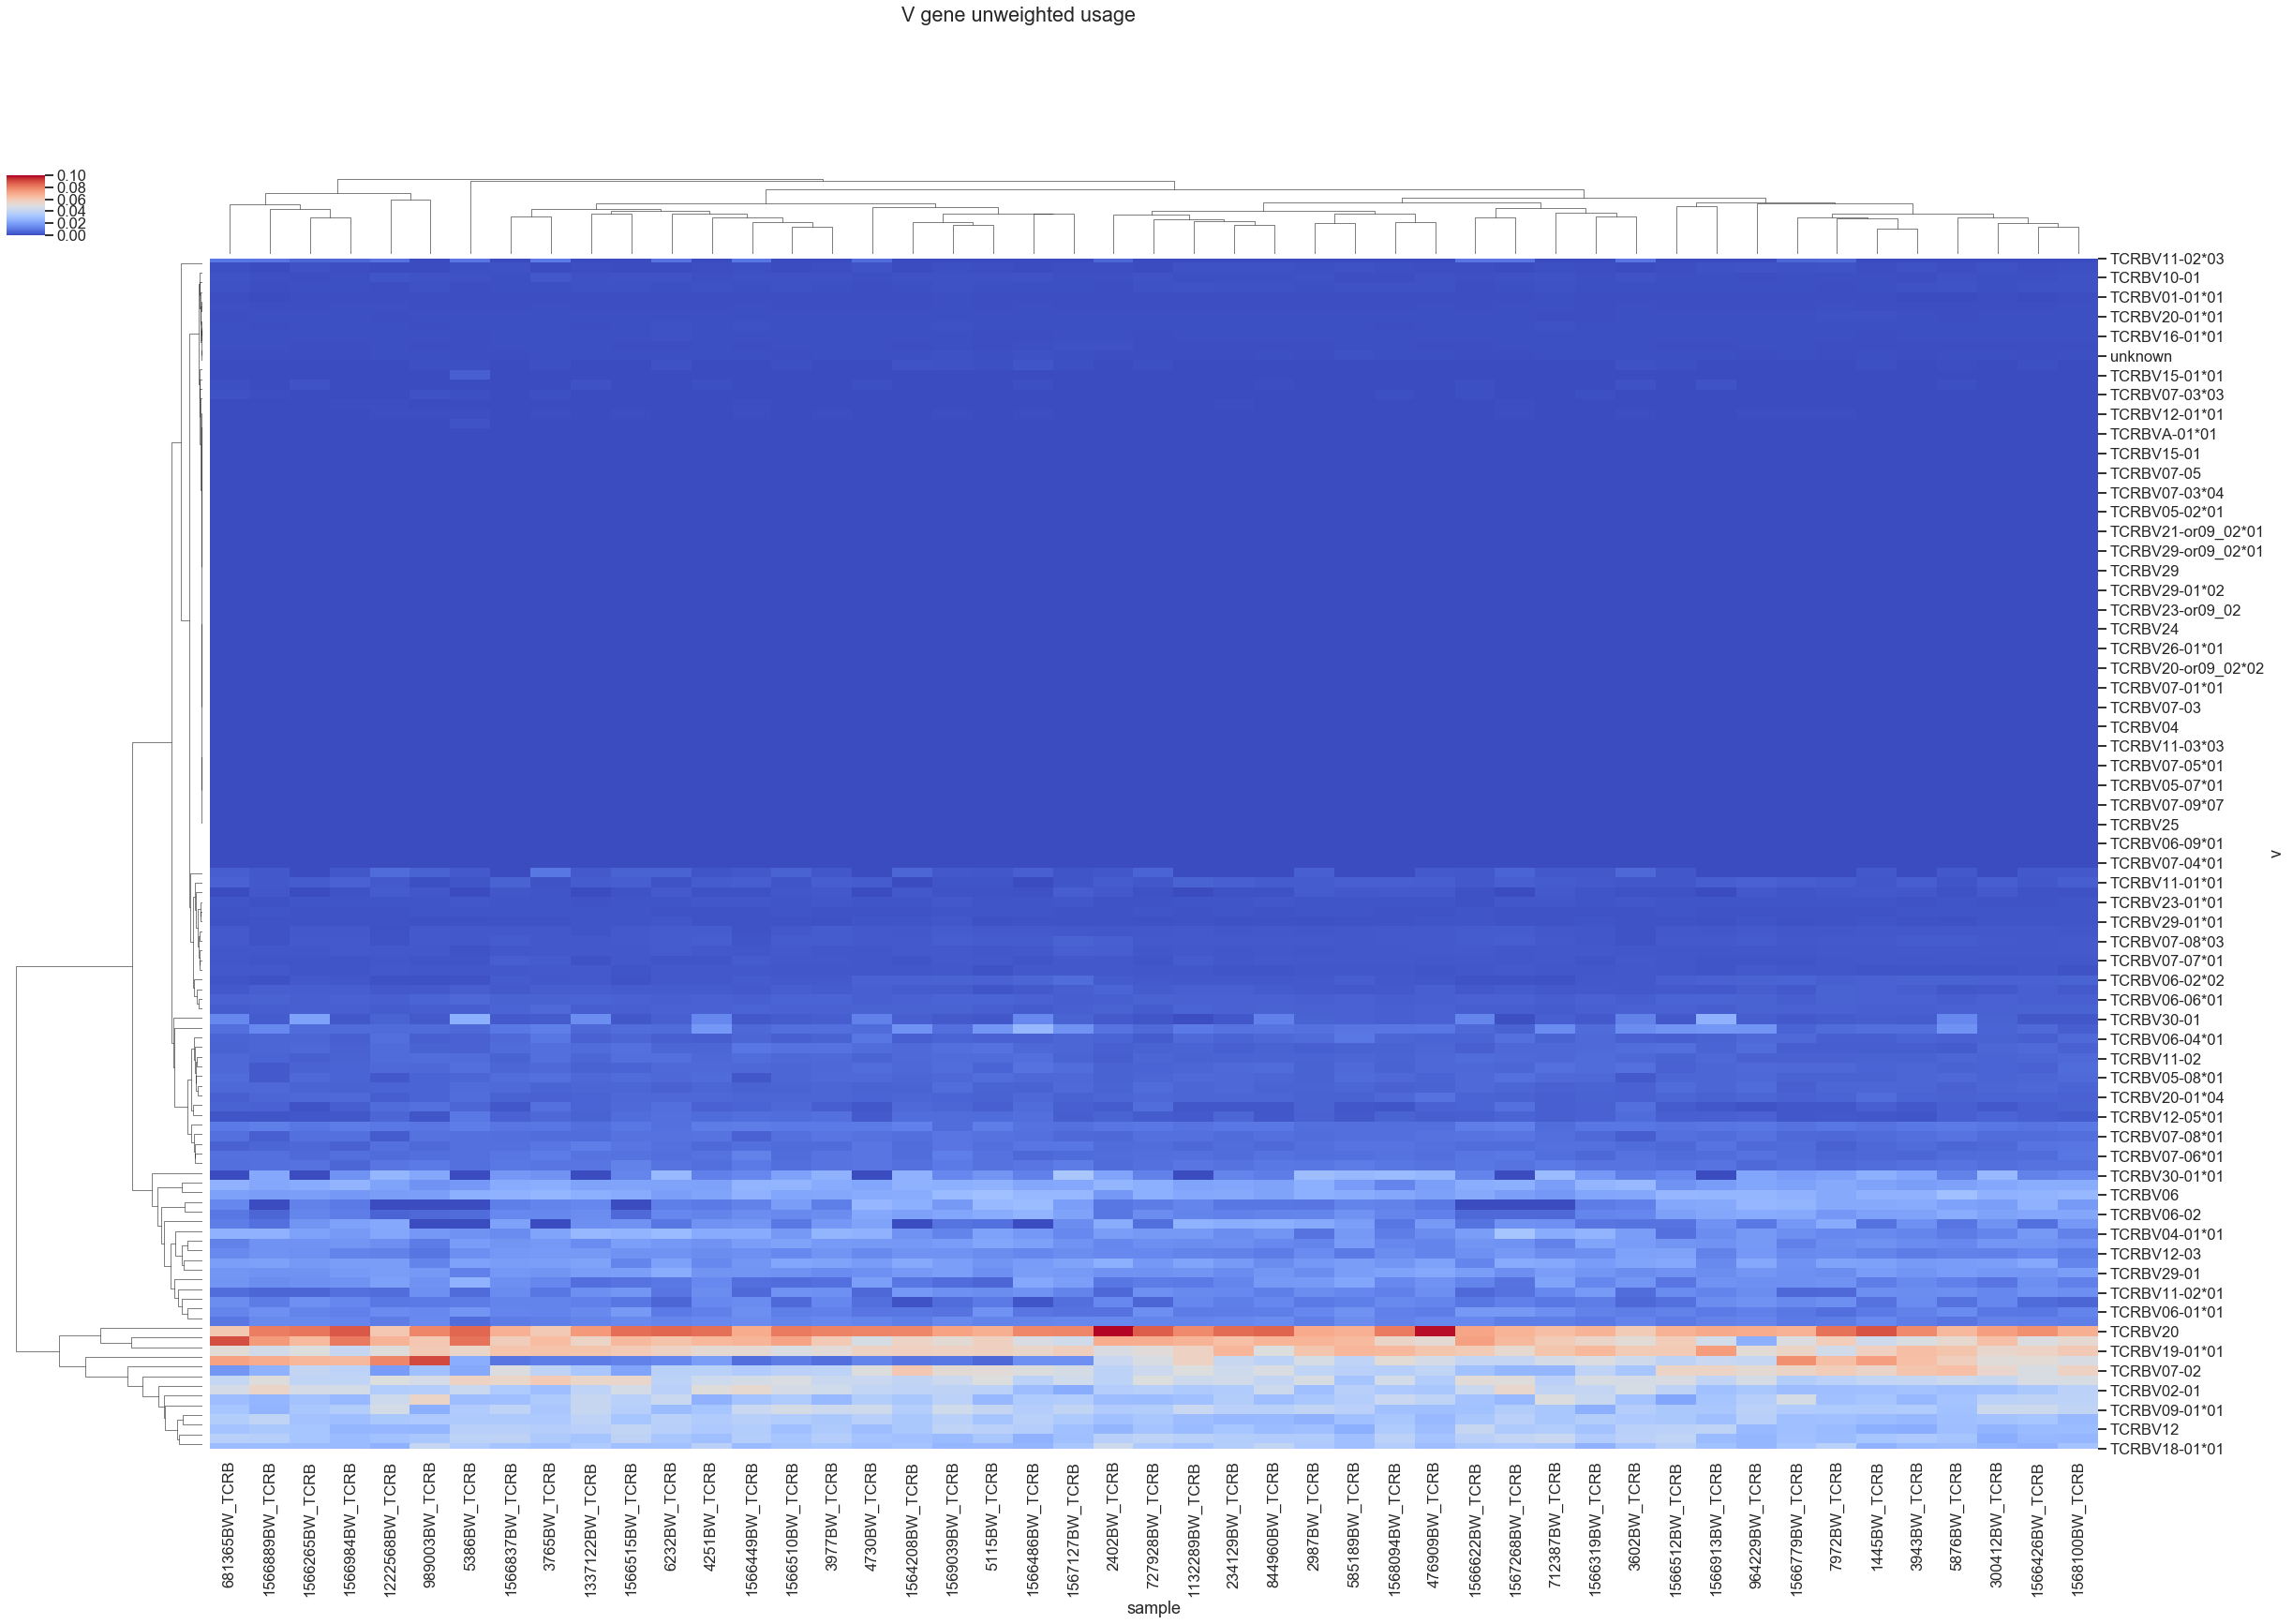

In [21]:
#reshape the dataframe to wide form dataframe
clustermap_data = pd.pivot_table(df_unweighted_frequency, values='unweighted_frequency', index=['v'], columns='sample')

#fill the missing value in frequency with 0
clustermap_data = clustermap_data.fillna(0)

#plot the hierarchically-clustered heatmap
ax = sns.clustermap(clustermap_data, figsize=(40,25),cmap="coolwarm")
ax.fig.suptitle('V gene unweighted usage') 